In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [48]:
frec=np.arange(0.1,2.0,0.1)
per = np.array([0.25,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.25,2.5,2.75,3,3.25,3.5,4,5,6,7,8,9,10.0,11,12])

# --- DIMENSIONS ---
rho = 1
l = 1  # length m
d = 1 # draft m
b = 1   # width m
nabla = l*b*d
g=9.806650

w = (2*np.pi)/per
print(len(per))

32


In [49]:
def read_AB(i,j, fname='pot_flow'):
    
    data = np.loadtxt(f'{fname}.1',skiprows=1)

    flags = np.logical_and( data[:,1]==i, data[:,2]==j) 
    AB = {}
    AB['T'] = data[flags,0]
    AB['A'] = data[flags,3]
    AB['B'] = data[flags,4]
    return AB

def read_RAO(eta_i,beta=0.0, fname='pot_flow'):
    data = np.loadtxt(f'{fname}.6',skiprows=1)

    flags = np.logical_and( data[:,1]==beta, data[:,2]==eta_i) 
    rao = {}
    rao['T'] = data[flags,0]
    rao['mod'] = data[flags,3]
    rao['phs'] = data[flags,4]
    rao['re'] = data[flags,5]
    rao['im'] = data[flags,6]

    return rao

# def plot_AB(i,j,fname=None):
#     AB = read_AB(i,j, fname)

#     fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8.5, 3.5),
#                         layout="constrained")
    
#     axs[0].plot(AB['T'],(AB['A'])/(rho*B*D*175),color="black",marker="o")
#     axs[0].set_xlabel('T [s]')
#     axs[0].set_ylabel(r'$A_{%d%d}/ \rho \nabla \ [-]$'%(i,j))
#     axs[0].set_ylim(bottom=0)
#     axs[0].set_xlim(right=20)
#     # axs[0].invert_yaxis()  # Flip x-axis for A plot
#     axs[0].grid()

#     axs[1].plot(AB['T'],(AB['B'])/(rho*B*D*175*w),color="black",marker="o")
#     axs[1].set_xlabel('T [s]')
#     axs[1].set_ylabel(r'$B_{%d%d}/ \rho \nabla \omega \ [-]$'%(i,j))
#     axs[1].set_xlim(right=20)
#     axs[1].grid()

# def plot_RAO(i,betas=[0],fname=None):

#     fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8.5, 3.5),
#                     layout="constrained")
        
#     for beta in betas:
#         rao = read_RAO(i,beta, fname)

#         axs[0].plot(rao['T'],rao['mod'], label='Wave %1.1f[deg]'%beta,color="black",marker="o")
#         axs[0].set_xlabel('T')
#         axs[0].set_ylabel(r'$\eta^{a}_{%d}/ \zeta_a$'%(i))
        

        
#         axs[1].plot(rao['T'],rao['phs'], label='Wave %1.1f[deg]'%beta,color="black",marker="o")
#         axs[1].set_xlabel('T')
#         axs[1].set_ylabel(r'$\eta^{\theta}_{%d} [deg]$'%(i))

#     axs[0].legend()
#     axs[1].legend()
   

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# params = {
#     'pot_flow': {'B': 10000, 'D': 2 / 13.33, 'label': 'Gunnar Study'},
#     # 'main_study_Stian/main_results/Stian_0/pot_flow': {'B': 14, 'D': 14 / 2, 'label': 'Stian Study'},
#     # 'Main Kristian/lengthresults/Arthur_0/pot_flow': {'B': 20, 'D': 20 / 2, 'label': 'Kristian Study'},
#     # 'lengthresults (1)/lengthresults/Arthur_0/pot_flow': {'B': 16, 'D': 16 / 2, 'label': 'Arthur Study'}
# }
# Set font to Times New Roman
# rcParams['font.family'] = 'Times New Roman'
rcParams['font.family'] = 'cmr10'  # This works in most cases

# Alternative approach (for better compatibility)
rcParams['text.usetex'] = True  # Enables LaTeX rendering
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
# Set default color palette (e.g., seaborn "husl")
palette = sns.color_palette("tab10", 3)

def plot_combined_AB(pairs, file_names, labels, axis_titles, save_files=None):
    """
    Plot A and B coefficients for multiple (i, j) pairs on separate graphs 
    with customizable labels, colors, and axis titles. Optionally save plots to PDF.
    
    Parameters:
        pairs (list of tuples): List of (i, j) pairs to plot.
        file_names (list of str): List of file names to read data from.
        labels (dict): Dictionary containing custom labels and colors for A and B plots:
            - "A_labels": List of labels for A coefficients.
            - "A_colors": List of colors for A lines.
            - "B_labels": List of labels for B coefficients.
            - "B_colors": List of colors for B lines.
        axis_titles (dict): Dictionary containing custom axis titles:
            - "x_label": X-axis label (same for both plots).
            - "y_A_label": Y-axis label for the A plot.
            - "y_B_label": Y-axis label for the B plot.
        save_files (dict): Dictionary containing file names for saving plots:
            - "A_file": File name for the A plot PDF (e.g., "A_plot.pdf").
            - "B_file": File name for the B plot PDF (e.g., "B_plot.pdf").
    """
    # Plot A coefficients
    fig_A, ax_A = plt.subplots(figsize=(7, 5))
    for i, j in pairs:
        for idx, fname in enumerate(file_names):
            AB = read_AB(i, j, fname)
            ax_A.plot(
                AB['T'], AB['A'] / (rho * nabla * 2),
                marker="o", markersize=4, linestyle="-",
                color=labels['A_colors'][idx],
                label=labels['A_labels'][idx]
            )

    ax_A.set_xlabel(axis_titles['x_label'],fontsize=19)
    ax_A.set_ylabel(axis_titles['y_A_label'],fontsize = 19)
    ax_A.tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    ax_A.tick_params(axis='x', labelsize=15)  # Set x-axis tick label size

    
    # ax_A.set_xticks(fontsize=15)
    # ax_A.set_yticks(fontsize=15)
    ax_A.legend()
    ax_A.grid(True, linestyle='--', alpha=0.6)

    # Save A plot if filename provided
    if save_files and "A_file" in save_files:
        fig_A.savefig(save_files["A_file"], format="pdf", bbox_inches="tight")
    plt.close(fig_A)  # Close the figure to prevent display during script execution

    # Plot B coefficients
    fig_B, ax_B = plt.subplots(figsize=(7, 5))
    for i, j in pairs:
        for idx, fname in enumerate(file_names):
            AB = read_AB(i, j, fname)
            ax_B.plot(
                AB['T'], AB['B'] / (rho * nabla * 2),
                marker="s", markersize=4, linestyle="-",
                color=labels['B_colors'][idx],
                label=labels['B_labels'][idx]
            )

    ax_B.set_xlabel(axis_titles['x_label'],fontsize=19)
    ax_B.set_ylabel(axis_titles['y_B_label'],fontsize=19)
   # Customize B plot
   # Customize B plot
    
    ax_B.tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    ax_B.tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax_B.legend()


    ax_B.grid(True, linestyle='--', alpha=0.6)

    # Save B plot if filename provided
    if save_files and "B_file" in save_files:
        fig_B.savefig(save_files["B_file"], format="pdf", bbox_inches="tight")
    plt.close(fig_B)  # Close the figure to prevent display during script execution
palette = sns.color_palette("tab10", 4)

# Example of how to call the function with custom labels, colors, and titles
plot_combined_AB(
    pairs=[(2, 2)],
    file_names=['mesh0','mesh1','mesh2','mesh3'],
    labels={
        "A_labels": ["Mesh 1", "Mesh 2", "Mesh 3", "Mesh 4"],
        "A_colors": [palette[0], palette[1],palette[2],palette[3]],  # Colors for A lines
        "B_labels": ["Mesh 1", "Mesh 2", "Mesh 3", "Mesh 4"],
        "B_colors": [palette[0], palette[1],palette[2],palette[3]],  # Colors for B lines
    },
    axis_titles={
        "x_label": "Period $T$ [s]",
        "y_A_label": r"$A_{22} / \rho \nabla L$ [m$^{-1}$]",
        "y_B_label": r"$B_{22} / \rho \nabla L \omega$ [m$^{-1}$]",

    },
    save_files={
        "A_file": "meshstudy_a22.pdf",
        "B_file": "meshstudy_b22.pdf"
    }
)

# Define all lengths
#lengths = ['10m', '20m', '30m', '40m', '50m', '80m', '100m', '110m', '120m', '140m', '150m']
lengths = ['1m', '2m', '5m','10m']

# Assign unique colors
num_lengths = len(lengths)
palette = sns.color_palette("tab10", num_lengths)

# Create label mappings
labels = {
    "A_labels": [length for length in lengths],  # Ensures correct labels
    "A_colors": palette,  # Directly map colors without indexing errors
    "B_labels": [length for length in lengths],
    "B_colors": palette
}


# Call the plotting function with all files
plot_combined_AB(
    pairs=[(2, 2)],
    file_names=lengths,
    labels=labels,
    axis_titles={
        "x_label": "Period $T$ [s]",
        "y_A_label": r"$A_{22} / \rho \nabla $ [-]",
        "y_B_label": r"$B_{22} \sqrt{l/2g} / \rho \nabla $ [-]"
    },
    save_files={
        "A_file": "combined_wamit_a22.pdf",
        "B_file": "combined_wamit_b22.pdf"
    }
)


ValueError: could not convert string to float: 'esh1'

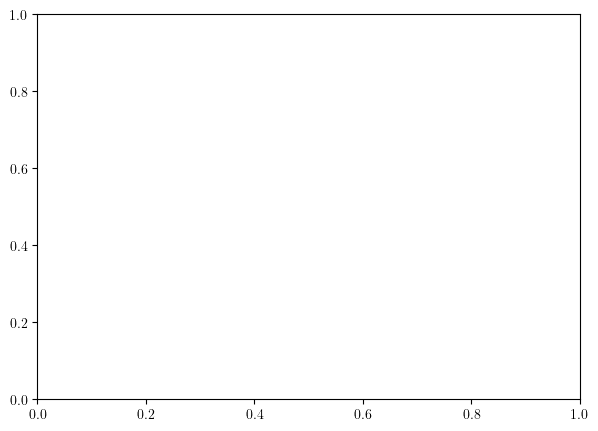

In [ ]:
# Sway mesh study


# Example of how to call the function with custom labels, colors, and titles
plot_combined_AB(
    pairs=[(2, 2)],
    file_names=['mesh1'],
    labels={
        "A_labels": ["Module 1"],
        "A_colors": [palette[0]],  # Colors for A lines
        "B_labels": ["Module 1"],
        "B_colors": [palette[0]],  # Colors for B lines
    },
    axis_titles={
        "x_label": "Period $T$ [s]",
        "y_A_label": r"$A_{33} / \rho \nabla $ [-]",
        "y_B_label": r"$B_{33} \sqrt{l/2g} / \rho \nabla $ [-]"
    },
    save_files={
        "A_file": "meshwamit_a22.pdf",
        "B_file": "meshwamit_b22.pdf"
    }
)


In [ ]:
# ---- HEAVE -----

# Example of how to call the function with custom labels, colors, and titles
plot_combined_AB(
    pairs=[(3, 3)],
    file_names=['10m'],
    labels={
        "A_labels": ["Module 1"],
        "A_colors": [palette[0]],  # Colors for A lines
        "B_labels": ["Module 1"],
        "B_colors": [palette[0]],  # Colors for B lines
    },
    axis_titles={
        "x_label": "Period $T$ [s]",
        "y_A_label": r"$A_{33} / \rho \nabla $ [-]",
        "y_B_label": r"$B_{33} \sqrt{l/2g} / \rho \nabla $ [-]"
    },
    save_files={
        "A_file": "10mwamit_a33.pdf",
        "B_file": "10mwamit_b33.pdf"
    }
)


In [ ]:
# ---- PITCH  (ROLL) -----
def plot_combined_pitch_AB(pairs, file_names, labels, axis_titles, save_files=None):
    """
    Plot A and B coefficients for multiple (i, j) pairs on separate graphs 
    with customizable labels, colors, and axis titles. Optionally save plots to PDF.
    
    Parameters:
        pairs (list of tuples): List of (i, j) pairs to plot.
        file_names (list of str): List of file names to read data from.
        labels (dict): Dictionary containing custom labels and colors for A and B plots:
            - "A_labels": List of labels for A coefficients.
            - "A_colors": List of colors for A lines.
            - "B_labels": List of labels for B coefficients.
            - "B_colors": List of colors for B lines.
        axis_titles (dict): Dictionary containing custom axis titles:
            - "x_label": X-axis label (same for both plots).
            - "y_A_label": Y-axis label for the A plot.
            - "y_B_label": Y-axis label for the B plot.
        save_files (dict): Dictionary containing file names for saving plots:
            - "A_file": File name for the A plot PDF (e.g., "A_plot.pdf").
            - "B_file": File name for the B plot PDF (e.g., "B_plot.pdf").
    """
    # Plot A coefficients
    fig_A, ax_A = plt.subplots(figsize=(7, 5))
    for idx, (i, j) in enumerate(pairs):
        for fname in file_names:
            # Read AB data for each file
            AB = read_AB(i, j, fname)
            
            # Get specific B, D, and label for the file
            # B = params[fname]['B']
            # D = params[fname]['D']
            
            # Plot A coefficients
            ax_A.plot(
                AB['T'], (AB['A']) / (rho * nabla* l), 
                marker="o", markersize = 4, linestyle="-", color=labels['A_colors'][idx],
                label=labels['A_labels'][idx]
            )
    ax_A.set_xlabel(axis_titles['x_label'],fontsize=19)
    ax_A.set_ylabel(axis_titles['y_A_label'],fontsize = 19)
    ax_A.tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    ax_A.tick_params(axis='x', labelsize=15)  # Set x-axis tick label size

    
    # ax_A.set_xticks(fontsize=15)
    # ax_A.set_yticks(fontsize=15)
    ax_A.legend()
    ax_A.grid(True, linestyle='--', alpha=0.6)

    # Save A plot if filename provided
    if save_files and "A_file" in save_files:
        fig_A.savefig(save_files["A_file"], format="pdf", bbox_inches="tight")
    plt.close(fig_A)  # Close the figure to prevent display during script execution

    # Plot B coefficients
    fig_B, ax_B = plt.subplots(figsize=(7, 5))
    for idx, (i, j) in enumerate(pairs):
        for fname in file_names:
            # Read AB data for each file
            AB = read_AB(i, j, fname)
            
            # # Get specific B, D, and label for the file
            # B = params[fname]['B']
            # D = params[fname]['D']
            
            # Plot B coefficients
            ax_B.plot(
                AB['T'], (AB['B']) * (l/2*g)**0.5 / (rho * nabla * l ), 
                marker="s",markersize=4, linestyle="-", color=labels['B_colors'][idx],
                label=labels['B_labels'][idx]
            )
    ax_B.set_xlabel(axis_titles['x_label'],fontsize=19)
    ax_B.set_ylabel(axis_titles['y_B_label'],fontsize=19)
   # Customize B plot
   # Customize B plot
    
    ax_B.tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    ax_B.tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax_B.legend()


    ax_B.grid(True, linestyle='--', alpha=0.6)

    # Save B plot if filename provided
    if save_files and "B_file" in save_files:
        fig_B.savefig(save_files["B_file"], format="pdf", bbox_inches="tight")
    plt.close(fig_B)  # Close the figure to prevent display during script execution


# Example of how to call the function with custom labels, colors, and titles
plot_combined_pitch_AB(
    pairs=[(4, 4)],
    file_names=['10m'],
    labels={
        "A_labels": ["Module 1"],
        "A_colors": [palette[0]],  # Colors for A lines
        "B_labels": ["Module 1"],
        "B_colors": [palette[0]],  # Colors for B lines
    },
    axis_titles={
        "x_label": "Period $T$ [s]",
        "y_A_label": r"$A_{44} / \rho \nabla l$ [-]",
        "y_B_label": r"$B_{44}\sqrt{l/2g} / \rho \nabla l $ [-]"
    },
    save_files={
        "A_file": "10mwamit_a44.pdf",
        "B_file": "10mwamit_b44.pdf"
    }
)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# params = {
#     'pot_flow': {'B': 10000, 'D': 2 / 13.33, 'label': 'Gunnar Study'},
#     # 'main_study_Stian/main_results/Stian_0/pot_flow': {'B': 14, 'D': 14 / 2, 'label': 'Stian Study'},
#     # 'Main Kristian/lengthresults/Arthur_0/pot_flow': {'B': 20, 'D': 20 / 2, 'label': 'Kristian Study'},
#     # 'lengthresults (1)/lengthresults/Arthur_0/pot_flow': {'B': 16, 'D': 16 / 2, 'label': 'Arthur Study'}
# }
# Set font to Times New Roman
# rcParams['font.family'] = 'Times New Roman'
rcParams['font.family'] = 'cmr10'  # This works in most cases

# Alternative approach (for better compatibility)
rcParams['text.usetex'] = True  # Enables LaTeX rendering
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
# Set default color palette (e.g., seaborn "husl")
palette = sns.color_palette("tab10", 3)

def plot_combined_AB(pairs, file_names, labels, axis_titles, save_files=None):
    """
    Plot A and B coefficients per unit length for multiple (i, j) pairs 
    on separate graphs with customizable labels, colors, and axis titles.

    Parameters:
        pairs (list of tuples): List of (i, j) pairs to plot.
        file_names (list of str): List of file names representing lengths (e.g., ["1m", "2m"]).
        labels (dict): Contains custom labels and colors for A and B plots:
            - "A_labels": List of labels for A coefficients.
            - "A_colors": List of colors for A lines.
            - "B_labels": List of labels for B coefficients.
            - "B_colors": List of colors for B lines.
        axis_titles (dict): Custom axis titles:
            - "x_label": X-axis label.
            - "y_A_label": Y-axis label for A plot.
            - "y_B_label": Y-axis label for B plot.
        save_files (dict, optional): File names for saving plots:
            - "A_file": File name for A plot PDF.
            - "B_file": File name for B plot PDF.
    """
    # Create a mapping of lengths to colors
    length_color_map = {length: color for length, color in zip(file_names, labels["A_colors"])}

    # Plot A coefficients
    fig_A, ax_A = plt.subplots(figsize=(7, 5))
    for (i, j) in pairs:
        for fname in file_names:
            AB = read_AB(i, j, fname)  # Read data
            length_value = float(fname.replace("m", ""))  # Convert "2m" -> 2.0
            color = length_color_map[fname]  # Get color from mapping
            
            ax_A.plot(
                AB['T'], (AB['A']) / (rho * nabla * length_value),  # Normalize by length
                marker="o", markersize=4, linestyle="-", color=color,
                label=f"$ {length_value / 1.3:.2f}$"
  # Use file name as label
            )

    ax_A.set_xlabel(axis_titles['x_label'], fontsize=19)
    ax_A.set_ylabel(axis_titles['y_A_label'], fontsize=19)
    ax_A.tick_params(axis='both', labelsize=15)
    ax_A.legend(title=r"$L/B$", title_fontsize=15)
    #ax_A.legend()
    ax_A.grid(True, linestyle='--', alpha=0.6)

    if save_files and "A_file" in save_files:
        fig_A.savefig(save_files["A_file"], format="pdf", bbox_inches="tight")
    plt.close(fig_A)

    # Plot B coefficients
    fig_B, ax_B = plt.subplots(figsize=(7, 5))
    for (i, j) in pairs:
        for fname in file_names:
            AB = read_AB(i, j, fname)  # Read data
            length_value = float(fname.replace("m", ""))  # Convert "2m" -> 2.0
            color = length_color_map[fname]  # Get color from mapping

            ax_B.plot(
                AB['T'], (AB['B'])  / (rho * nabla * length_value),  # Normalize by length
                marker="s", markersize=4, linestyle="-", color=color,
                label=f"${length_value / 1.3:.2f}$"

            )

    ax_B.set_xlabel(axis_titles['x_label'], fontsize=19)
    ax_B.set_ylabel(axis_titles['y_B_label'], fontsize=19)
    ax_B.tick_params(axis='both', labelsize=15)
    #ax_B.legend()
    ax_B.legend(title=r"$L/B$", title_fontsize=15)
    ax_B.grid(True, linestyle='--', alpha=0.6)

    if save_files and "B_file" in save_files:
        fig_B.savefig(save_files["B_file"], format="pdf", bbox_inches="tight")
    plt.close(fig_B)
# Example of how to call the function with custom labels, colors, and titles
# plot_combined_AB(
#     pairs=[(2, 2)],
#     file_names=['2m'],
#     labels={
#         "A_labels": ["2m"],
#         "A_colors": [palette[0]],  # Colors for A lines
#         "B_labels": ["2m"],
#         "B_colors": [palette[0]],  # Colors for B lines
#     },
#     axis_titles={
#         "x_label": "Period $T$ [s]",
#         "y_A_label": r"$A_{22} / \rho \nabla $ [-]",
#         "y_B_label": r"$B_{22} \sqrt{l/2g} / \rho \nabla $ [-]"
#     },
#     save_files={
#         "A_file": "2mwamit_a22.pdf",
#         "B_file": "2mwamit_b22.pdf"
#     }
# )

# Define all lengths
#lengths = ['10m', '20m', '30m', '40m', '50m', '80m', '100m', '110m', '120m', '140m', '150m']
lengths = ['1m', '2m', '5m','10m','20m','30m']

# Assign unique colors per length
num_lengths = len(lengths)
palette = sns.color_palette("tab10", num_lengths)

# Create a direct mapping of lengths to colors and labels
length_color_map = {length: palette[i] for i, length in enumerate(lengths)}

labels = {
    "A_labels": lengths,  # Directly use the length names as labels
    "A_colors": [length_color_map[length] for length in lengths],  # Correct colors
    "B_labels": lengths,
    "B_colors": [length_color_map[length] for length in lengths],
}


# Call the plotting function with all files
plot_combined_AB(
    pairs=[(2, 2)],
    file_names=lengths,
    labels=labels,
    axis_titles = {
    "x_label": "Period $T$ [s]",
    "y_A_label": r"$A_{22} / (\rho \nabla L)$ [m$^{-1}$]",  # Add division by L
    "y_B_label": r"$B_{22} / (\rho \nabla L \omega)$ [m$^{-1}$]"  # Add division by L
    },
    save_files={
        "A_file": "combinedunit_wamit_a22.pdf",
        "B_file": "combinedunit_wamit_b22.pdf"
    }
)



In [ ]:
# ---- HEAVE -----
# Call the plotting function with all files
plot_combined_AB(
    pairs=[(3, 3)],
    file_names=lengths,
    labels=labels,
    axis_titles = {
    "x_label": "Period $T$ [s]",
    "y_A_label": r"$A_{33} / (\rho \nabla L)$ [m$^{-1}$]",  # Add division by L
    "y_B_label": r"$B_{33} \sqrt{l/2g} / (\rho \nabla L)$ [m$^{-1}$]"  # Add division by L
    },
    save_files={
        "A_file": "combinedunit_wamit_a33.pdf",
        "B_file": "combinedunit_wamit_b33.pdf"
    }
)

In [ ]:
# ---- Pitch -----
# Call the plotting function with all files
plot_combined_AB(
    pairs=[(4, 4)],
    file_names=lengths,
    labels=labels,
    axis_titles = {
    "x_label": "Period $T$ [s]",
    "y_A_label": r"$A_{44} / \rho \nabla l$ [m$^{-1}$]",  # Add division by L
    "y_B_label": r"$B_{44}\sqrt{l/2g} / \rho \nabla l * l $ [m$^{-1}$]"  # Add division by L
    },
    save_files={
        "A_file": "combinedunit_wamit_a44.pdf",
        "B_file": "combinedunit_wamit_b44.pdf"
    }
)


